In [38]:
import scipy.io
import keras
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import random 
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

%matplotlib inline 



In [2]:
df=pd.read_msgpack('/Users/liginsolamen/MRE/MREData/MREdata_070718.msg')


In [39]:
Ur=np.stack(df.Ur.values,axis=3).transpose(3,0,1,2).reshape(168,-1)
Ui=np.stack(df.Ui.values,axis=3).transpose(3,0,1,2).reshape(168,-1)

X=np.sqrt(Ui**2+Ur**2)
Y=np.stack(df.RS.values,axis=2).transpose(2,0,1).reshape(168,-1)

print(X.shape)
print(Y.shape)

(168, 12288)
(168, 4096)


In [41]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3)
train_X,valid_X,train_Y,valid_Y=train_test_split(train_X,train_Y,test_size=0.3)

In [44]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(X.shape[1],)))
#32= # of units

#adding a second layer
model.add(Dense(100,activation='relu'))

#adding a third layer
model.add(Dense(100,activation='relu'))

#Final Layer: needs to be the same size as your desired output
model.add(Dense(Y.shape[1],activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                393248    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               3300      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              413696    
Total params: 820,344
Trainable params: 820,344
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='mean_squared_error',
             optimizer='adam')

In [47]:
model.fit(train_X,train_Y,epochs=100,batch_size=1,validation_data=(valid_X,valid_Y))

Train on 81 samples, validate on 36 samples
Epoch 1/100
81/81 [==============================] - 1s 15ms/step - loss: 2802296.7871 - val_loss: 3079853.5618
Epoch 2/100
81/81 [==============================] - 1s 15ms/step - loss: 2560705.8526 - val_loss: 2671232.2452
Epoch 3/100
81/81 [==============================] - 1s 15ms/step - loss: 2335243.3688 - val_loss: 2428260.7769
Epoch 4/100
81/81 [==============================] - 1s 15ms/step - loss: 2020254.7242 - val_loss: 2149351.8945
Epoch 5/100
81/81 [==============================] - 1s 15ms/step - loss: 1751755.8798 - val_loss: 1842059.1241
Epoch 6/100
81/81 [==============================] - 1s 15ms/step - loss: 1434447.8397 - val_loss: 1564176.9482
Epoch 7/100
81/81 [==============================]

In [53]:
y_predict=model.predict(test_X).reshape(test_X.shape[0],64,64)
ytest=test_Y.reshape(test_Y.shape[0],64,64)

In [60]:
y_predict.shape


(51, 64, 64)

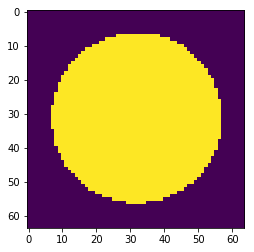

In [71]:
plt.imshow(ytest[15])

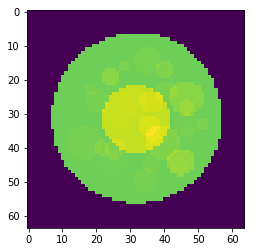

In [75]:
plt.imshow(y_predict[25])